# Heat Indices — Predictions

### Importing libraries

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from modules import relHumidity, heatIndex
from sklearn.linear_model import LinearRegression
import numpy as np

### Importing datasets and creating dataframe

In [2]:
temps = pd.read_csv("generated_data/meantemp_pred.csv")
dps = pd.read_csv("generated_data/dptemp_pred.csv")

final_preds = pd.merge(temps, dps, on = "ds")

final_preds = final_preds.rename(columns = {"ds": "DATE", 
                                            "yhat1_x": "MEAN_TEMP",
                                            "yhat1_y": "DP_TEMP"})

final_preds

,DATE,MEAN_TEMP,DP_TEMP
0,2023-06-15,83.671234,76.701004
1,2023-06-16,82.765839,76.627838
2,2023-06-17,82.541199,76.237350
3,2023-06-18,82.770287,76.252762
4,2023-06-19,83.027359,76.477051
...,...,...,...
11153,2053-12-27,72.773010,70.641846
11154,2053-12-28,72.621429,70.339104
11155,2053-12-29,72.382889,70.110641
11156,2053-12-30,72.157440,69.832550


In [3]:
data_hist = pd.read_csv("generated_data/historic_hi.csv")
data_rec = pd.read_csv("generated_data/recent_hi.csv")
data_lat = pd.read_csv("generated_data/latest_hi.csv")

### appends the two dataframes and creates a master dataframe
master = pd.concat([data_hist, data_rec, data_lat], ignore_index = True)

### filters for Miami-Dade county data
dade_daily_avg = master[master["COUNTY"] == "Miami-Dade"].reset_index(drop = True)
dade_daily_avg = dade_daily_avg.sort_values(by = "DATE", ascending = True).reset_index(drop = True)

cols = ["DATE", "TMEAN", "TDMEAN", "TMEAN_INDEX"]
dade_daily_avg = dade_daily_avg[cols]
dade_daily_avg = dade_daily_avg.rename(columns = {"TMEAN": "MEAN_TEMP",
                                                  "TDMEAN": "DP_TEMP",
                                                  "TMEAN_INDEX": "INDEX"
                                                    })
dade_daily_avg["DATE"] = pd.to_datetime(dade_daily_avg["DATE"])

dade_daily_avg

,DATE,MEAN_TEMP,DP_TEMP,INDEX
0,1983-01-01,76.2,69.6,76.7
1,1983-01-02,74.3,68.5,74.8
2,1983-01-03,74.5,69.4,75.1
3,1983-01-04,73.6,64.7,73.9
4,1983-01-05,71.2,64.1,71.5
...,...,...,...,...
14770,2023-06-10,80.8,75.1,86.5
14771,2023-06-11,82.4,75.0,89.3
14772,2023-06-12,81.4,76.2,88.3
14773,2023-06-13,81.1,76.3,87.8


### Using predicted relative humidity and dewpoint temperature to compute heat index

In [4]:
final_preds["REL_HUMIDITY"] = ""
final_preds["INDEX"] = ""

### loop runs through dataframe
for i in range(0, len(final_preds)):
    
    ### stores mean temperature and mean dewpoint
    temp_mean = final_preds["MEAN_TEMP"][i]
    dew = final_preds["DP_TEMP"][i]
    
    ### calls predefined method and computes relative humidity
    final_preds["REL_HUMIDITY"][i] = round(relHumidity(temp_mean, dew), 1)
    
    ### calls predefined method and computes heat indices 
    final_preds["INDEX"][i] = heatIndex(final_preds["MEAN_TEMP"][i], final_preds["REL_HUMIDITY"][i])
    
    ### prints out a progress report showing number of rows processed    
    if(i%1000 == 0):
        print("Completed: ", str(int(i/len(final_preds) * 100)), "%")
        print("Rows completed: ", str(i))
        print("_______")
    elif(i == (len(final_preds) - 1)):
        print("Completed: 100%")
        print("_______")
        print("_______") 

/var/folders/8_/vf0g3np57bdb6_x59hshmtcr0000gn/T/ipykernel_16244/1599646106.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_preds["REL_HUMIDITY"][i] = round(relHumidity(temp_mean, dew), 1)
/var/folders/8_/vf0g3np57bdb6_x59hshmtcr0000gn/T/ipykernel_16244/1599646106.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_preds["INDEX"][i] = heatIndex(final_preds["MEAN_TEMP"][i], final_preds["REL_HUMIDITY"][i])


Completed:  0 %
Rows completed:  0
_______
Completed:  8 %
Rows completed:  1000
_______
Completed:  17 %
Rows completed:  2000
_______
Completed:  26 %
Rows completed:  3000
_______
Completed:  35 %
Rows completed:  4000
_______
Completed:  44 %
Rows completed:  5000
_______
Completed:  53 %
Rows completed:  6000
_______
Completed:  62 %
Rows completed:  7000
_______
Completed:  71 %
Rows completed:  8000
_______
Completed:  80 %
Rows completed:  9000
_______
Completed:  89 %
Rows completed:  10000
_______
Completed:  98 %
Rows completed:  11000
_______
Completed: 100%
_______
_______


In [5]:
### converts column to date-time type
final_preds["DATE"] = pd.to_datetime(final_preds["DATE"])

final_preds

,DATE,MEAN_TEMP,DP_TEMP,REL_HUMIDITY,INDEX
0,2023-06-15,83.671234,76.701004,79.7,93.0
1,2023-06-16,82.765839,76.627838,81.8,91.3
2,2023-06-17,82.541199,76.237350,81.4,90.5
3,2023-06-18,82.770287,76.252762,80.8,91.0
4,2023-06-19,83.027359,76.477051,80.7,91.6
...,...,...,...,...,...
11153,2053-12-27,72.773010,70.641846,93.1,73.4
11154,2053-12-28,72.621429,70.339104,92.6,73.3
11155,2053-12-29,72.382889,70.110641,92.6,73.0
11156,2053-12-30,72.157440,69.832550,92.4,72.8


### Plotting mean temperatures

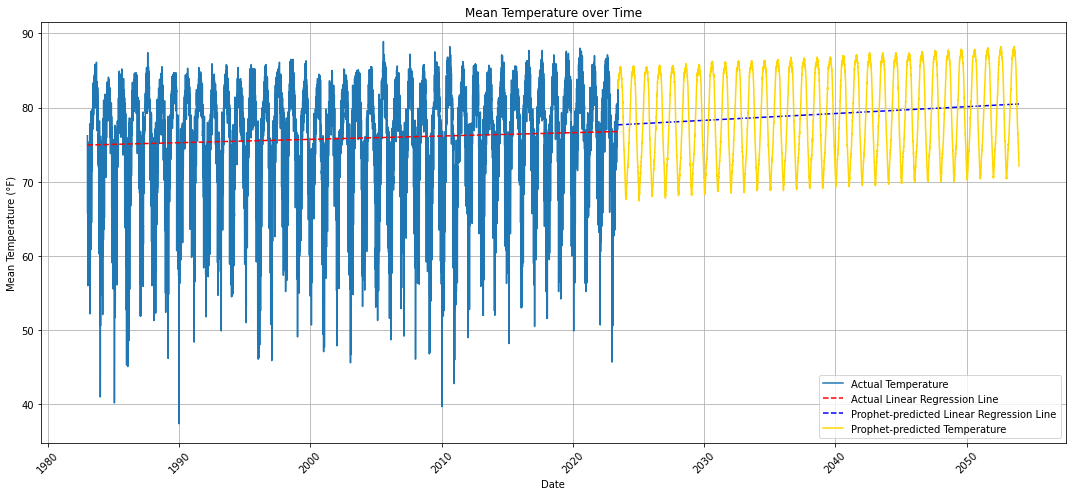

In [6]:
### reshapes index for linear regression
X_1 = dade_daily_avg.index.values.reshape(-1, 1)
y_1 = dade_daily_avg["MEAN_TEMP"]

### creates and implements model
model_1 = LinearRegression()
model_1.fit(X_1, y_1)

### reshapes index for linear regression
X_2 = final_preds.index.values.reshape(-1, 1)
y_2 = final_preds["MEAN_TEMP"]

### creates and implements model
model_2 = LinearRegression()
model_2.fit(X_2, y_2)

### extends index for prediction
start_date = "2023-06-15"
end_date = "2053-12-31"
extended_dates_range = pd.date_range(start = start_date, end = end_date, freq = "D")

### converts dates to YYYY-MM-DD format
extended_dates = extended_dates_range.strftime("%Y-%m-%d")

### creates plot
plt.figure(figsize = (15, 7))
plt.plot(dade_daily_avg["DATE"], dade_daily_avg["MEAN_TEMP"], label = "Actual Temperature")
plt.plot(dade_daily_avg["DATE"], model_1.predict(X_1), linestyle = "dashed", color = "red", label = "Actual Linear Regression Line")
plt.plot(final_preds["DATE"], model_2.predict(X_2), linestyle = "dashed", color = "blue", label = "Prophet-predicted Linear Regression Line")
plt.plot(final_preds["DATE"], final_preds["MEAN_TEMP"], label = "Prophet-predicted Temperature", color = "gold")


plt.xlabel("Date")
plt.ylabel("Mean Temperature (°F)")
plt.title("Mean Temperature over Time")
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Plotting dewpoint temperatures

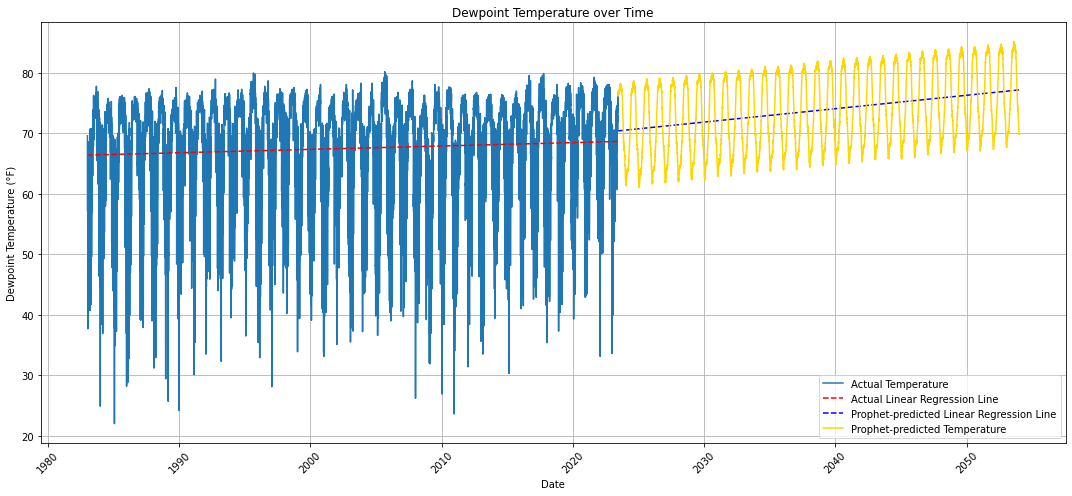

In [7]:
### reshapes index for linear regression
X_1 = dade_daily_avg.index.values.reshape(-1, 1)
y_1 = dade_daily_avg["DP_TEMP"]

### creates and implements model
model_1 = LinearRegression()
model_1.fit(X_1, y_1)

### reshapes index for linear regression
X_2 = final_preds.index.values.reshape(-1, 1)
y_2 = final_preds["DP_TEMP"]

### creates and implements model
model_2 = LinearRegression()
model_2.fit(X_2, y_2)

### extends index for prediction
start_date = "2023-06-15"
end_date = "2053-12-31"
extended_dates_range = pd.date_range(start = start_date, end = end_date, freq = "D")

### converts dates to YYYY-MM-DD format
extended_dates = extended_dates_range.strftime("%Y-%m-%d")

### creates plot
plt.figure(figsize = (15, 7))
plt.plot(dade_daily_avg["DATE"], dade_daily_avg["DP_TEMP"], label = "Actual Temperature")
plt.plot(dade_daily_avg["DATE"], model_1.predict(X_1), linestyle = "dashed", color = "red", label = "Actual Linear Regression Line")
plt.plot(final_preds["DATE"], model_2.predict(X_2), linestyle = "dashed", color = "blue", label = "Prophet-predicted Linear Regression Line")
plt.plot(final_preds["DATE"], final_preds["DP_TEMP"], label = "Prophet-predicted Temperature", color = "gold")


plt.xlabel("Date")
plt.ylabel("Dewpoint Temperature (°F)")
plt.title("Dewpoint Temperature over Time")
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
### Plotting heat index

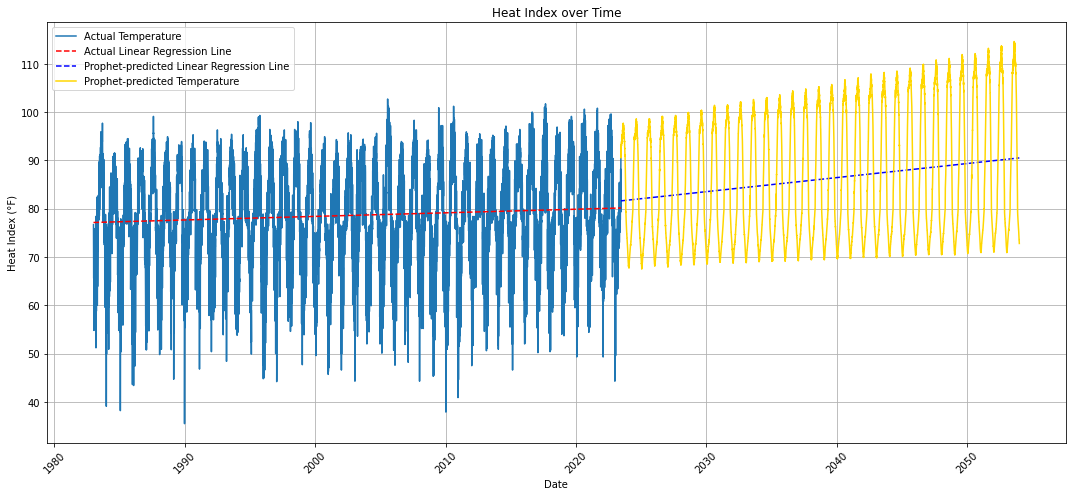

In [9]:
### reshapes index for linear regression
X_1 = dade_daily_avg.index.values.reshape(-1, 1)
y_1 = dade_daily_avg["INDEX"]

### creates and implements model
model_1 = LinearRegression()
model_1.fit(X_1, y_1)

### reshapes index for linear regression
X_2 = final_preds.index.values.reshape(-1, 1)
y_2 = final_preds["INDEX"]

### creates and implements model
model_2 = LinearRegression()
model_2.fit(X_2, y_2)

### extends index for prediction
start_date = "2023-06-15"
end_date = "2053-12-31"
extended_dates_range = pd.date_range(start = start_date, end = end_date, freq = "D")

### converts dates to YYYY-MM-DD format
extended_dates = extended_dates_range.strftime("%Y-%m-%d")

### creates plot
plt.figure(figsize = (15, 7))
plt.plot(dade_daily_avg["DATE"], dade_daily_avg["INDEX"], label = "Actual Temperature")
plt.plot(dade_daily_avg["DATE"], model_1.predict(X_1), linestyle = "dashed", color = "red", label = "Actual Linear Regression Line")
plt.plot(final_preds["DATE"], model_2.predict(X_2), linestyle = "dashed", color = "blue", label = "Prophet-predicted Linear Regression Line")
plt.plot(final_preds["DATE"], final_preds["INDEX"], label = "Prophet-predicted Temperature", color = "gold")


plt.xlabel("Date")
plt.ylabel("Heat Index (°F)")
plt.title("Heat Index over Time")
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
final_preds.to_csv("generated_data/predictions.csv", index = False)